In [11]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
path_mathias_backgrounds = "backgrounds_mathias/"
path_mathias_backgrounds_without_pedestal = "backgrounds_mathias_without_pedestal/"

In [13]:
if not os.path.exists(path_mathias_backgrounds_without_pedestal):
    os.makedirs(path_mathias_backgrounds_without_pedestal)

In [14]:
path_background_vis = path_mathias_backgrounds + "EUC_MER_BGSUB-MOSAIC-VIS_TILE101019127-2ADA59_20240112T193045.603369Z_00.00.fits"
path_background_nisp_y = path_mathias_backgrounds + "EUC_MER_BGSUB-MOSAIC-NIR-Y_TILE101019127-CFC333_20240112T190219.154592Z_00.00.fits"
path_background_nisp_j = path_mathias_backgrounds + "EUC_MER_BGSUB-MOSAIC-NIR-J_TILE101019127-ECE21F_20240112T185713.437206Z_00.00.fits"
path_background_nisp_h = path_mathias_backgrounds + "EUC_MER_BGSUB-MOSAIC-NIR-H_TILE101019127-6715A1_20240112T190340.364333Z_00.00.fits"

In [15]:
path_background_vis_without_pedestal = path_mathias_backgrounds_without_pedestal + "EUC_MER_BGSUB-MOSAIC-VIS_TILE101019127-2ADA59_20240112T193045.603369Z_00.00.fits"
path_background_nisp_y_without_pedestal = path_mathias_backgrounds_without_pedestal + "EUC_MER_BGSUB-MOSAIC-NIR-Y_TILE101019127-CFC333_20240112T190219.154592Z_00.00.fits"
path_background_nisp_j_without_pedestal = path_mathias_backgrounds_without_pedestal + "EUC_MER_BGSUB-MOSAIC-NIR-J_TILE101019127-ECE21F_20240112T185713.437206Z_00.00.fits"
path_background_nisp_h_without_pedestal = path_mathias_backgrounds_without_pedestal + "EUC_MER_BGSUB-MOSAIC-NIR-H_TILE101019127-6715A1_20240112T190340.364333Z_00.00.fits"

## VIS

-0.052621927
548.263
0.0047257626
0.5401359


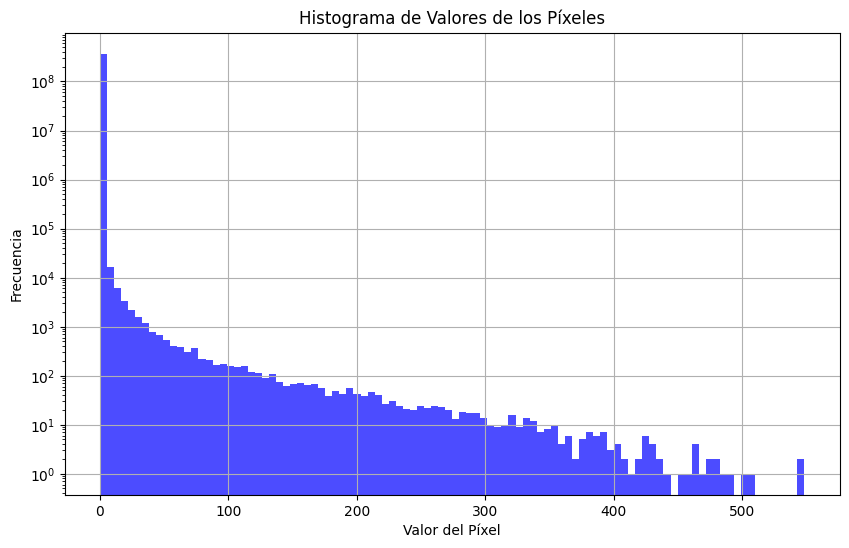

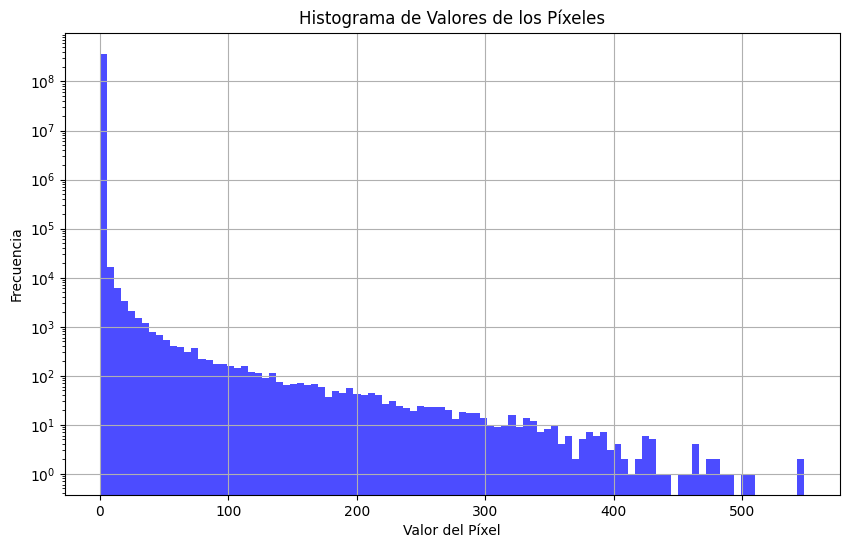

In [16]:
# Abrir el archivo FITS original
hdu_list = fits.open(path_background_vis)
image_data = hdu_list[0].data
header = hdu_list[0].header  # Copiar la cabecera
hdu_list.close()

# Calcular la media y la desviación estándar de toda la imagen
mean_background = np.mean(image_data)
std_background = np.std(image_data)
min_val = np.min(image_data)
print(min_val)
max_val = np.max(image_data)
print(max_val)

print(mean_background)
print(std_background)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

# Sustraer el ruido de fondo de la imagen completa
image_data_subtracted = image_data - mean_background
# Ajustar los valores negativos a 0
image_data_subtracted = np.maximum(image_data_subtracted, 1e-10)

# Guardar la imagen con el ruido sustraído y la cabecera original
hdu = fits.PrimaryHDU(data=image_data_subtracted, header=header)
hdu.writeto(path_background_vis_without_pedestal, overwrite=True)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data_subtracted.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

In [17]:
## NISP H

-246.73033
13621.895
1.0881466
32.281662


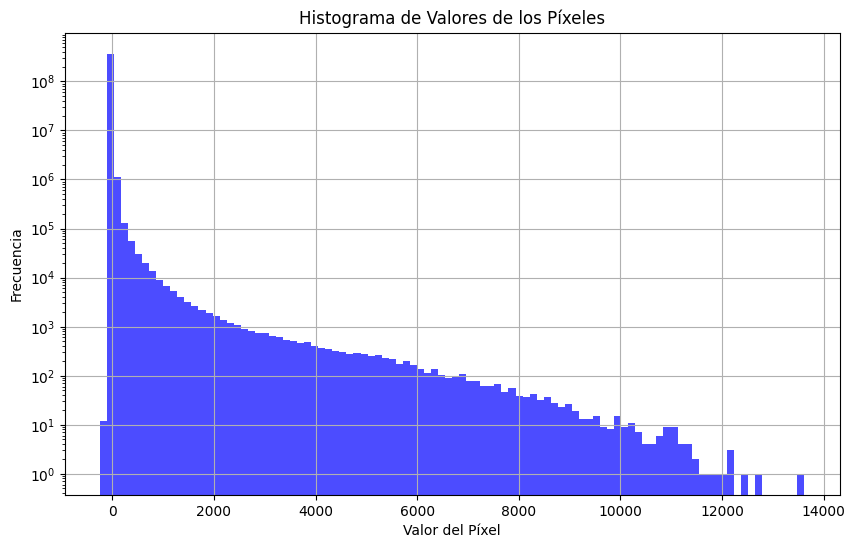

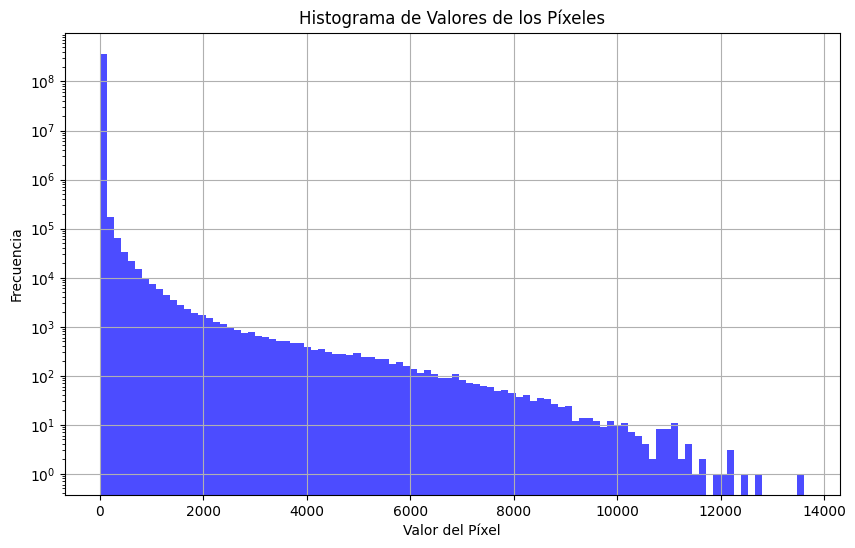

In [18]:
# Abrir el archivo FITS original
hdu_list = fits.open(path_background_nisp_h)
image_data = hdu_list[0].data
header = hdu_list[0].header  # Copiar la cabecera
hdu_list.close()

# Calcular la media y la desviación estándar de toda la imagen
mean_background = np.mean(image_data)
std_background = np.std(image_data)
min_val = np.min(image_data)
print(min_val)
max_val = np.max(image_data)
print(max_val)

print(mean_background)
print(std_background)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

# Sustraer el ruido de fondo de la imagen completa
image_data_subtracted = image_data - mean_background
# Ajustar los valores negativos a 0
image_data_subtracted = np.maximum(image_data_subtracted, 1e-10)

# Guardar la imagen con el ruido sustraído y la cabecera original
hdu = fits.PrimaryHDU(data=image_data_subtracted, header=header)
hdu.writeto(path_background_nisp_h_without_pedestal, overwrite=True)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data_subtracted.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

## NISP J

-224.78758
13054.719
0.8363507
26.147398


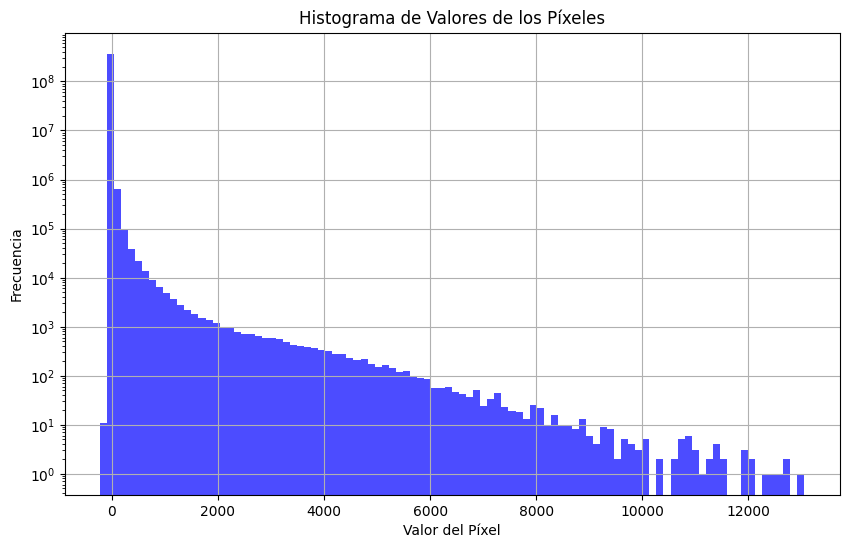

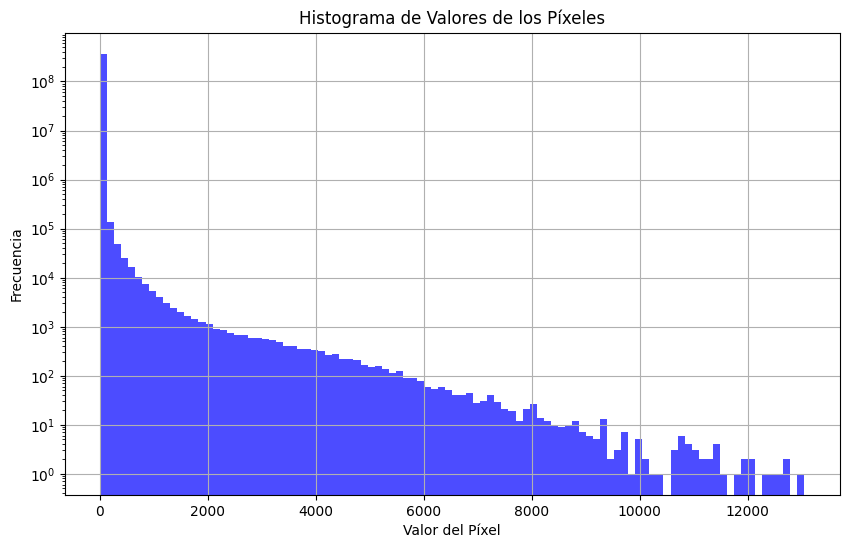

In [19]:
# Abrir el archivo FITS original
hdu_list = fits.open(path_background_nisp_j)
image_data = hdu_list[0].data
header = hdu_list[0].header  # Copiar la cabecera
hdu_list.close()

# Calcular la media y la desviación estándar de toda la imagen
mean_background = np.mean(image_data)
std_background = np.std(image_data)
min_val = np.min(image_data)
print(min_val)
max_val = np.max(image_data)
print(max_val)

print(mean_background)
print(std_background)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

# Sustraer el ruido de fondo de la imagen completa
image_data_subtracted = image_data - mean_background
# Ajustar los valores negativos a 0
image_data_subtracted = np.maximum(image_data_subtracted, 1e-10)

# Guardar la imagen con el ruido sustraído y la cabecera original
hdu = fits.PrimaryHDU(data=image_data_subtracted, header=header)
hdu.writeto(path_background_nisp_j_without_pedestal, overwrite=True)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data_subtracted.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

## NISP Y

-292.90268
13721.119
0.6946934
26.154753


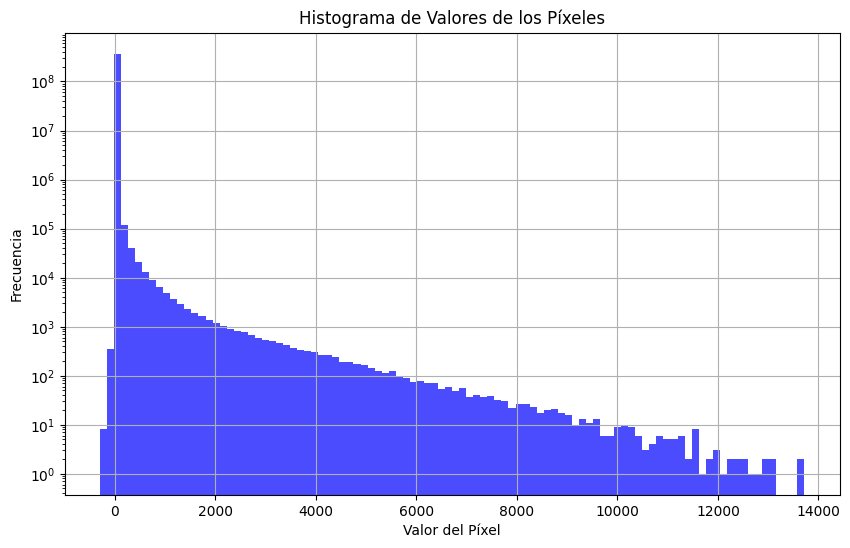

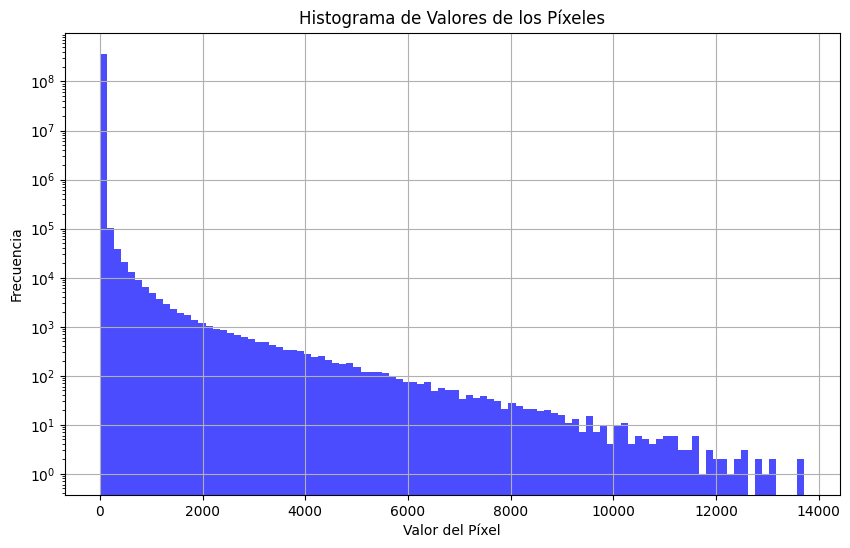

In [20]:
# Abrir el archivo FITS original
hdu_list = fits.open(path_background_nisp_y)
image_data = hdu_list[0].data
header = hdu_list[0].header  # Copiar la cabecera
hdu_list.close()

# Calcular la media y la desviación estándar de toda la imagen
mean_background = np.mean(image_data)
std_background = np.std(image_data)
min_val = np.min(image_data)
print(min_val)
max_val = np.max(image_data)
print(max_val)

print(mean_background)
print(std_background)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

# Sustraer el ruido de fondo de la imagen completa
image_data_subtracted = image_data - mean_background
# Ajustar los valores negativos a 0
image_data_subtracted = np.maximum(image_data_subtracted, 1e-10)

# Guardar la imagen con el ruido sustraído y la cabecera original
hdu = fits.PrimaryHDU(data=image_data_subtracted, header=header)
hdu.writeto(path_background_nisp_y_without_pedestal, overwrite=True)

# Mostrar el histograma de los valores de los píxeles
plt.figure(figsize=(10, 6))
plt.hist(image_data_subtracted.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Valores de los Píxeles')
plt.xlabel('Valor del Píxel')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()